# Sentiment Analysis using a Multi-Layer Perceptron Model.

According to dictionary, sentiment analysis (aka opinion mining) is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.

Our objective is to train a neural network and mould it into a textual sentiment aficionado.

## 1. Import Libraries.

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import optimizers
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from sklearn.metrics import accuracy_score

## 2. Peek at the data.
Keras library has a preprocessed version of the IMDB movie reviews library which we will be using to train our sentiment analysis model. which contains 50,000 reviews collected from IMDB (Internet Movie Database). These reviews are cleaned and all the words are mapped to respective integers.


About 80% of all written material uses only 5000 words, based on a research by Francis and Kucera in 1982. The following chart is a product of their labour. Other words seldom appear in written text. Therefore we will load only the top 5000 words from the dataset.

![word chart](https://marcgawley.files.wordpress.com/2011/10/graph-of-vocabulary-size-for-percentage-of-written-english-text-covered1.png)

We will train our network on 25,000 reviews and test it on another 25,000. 

In [117]:
max_vocab_size = 5000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = max_vocab_size)
print("Number of reviews in training set =", len(train_data))
print("Number of reviews in testing set =", len(test_data))

Number of reviews in training set = 25000
Number of reviews in testing set = 25000


In [118]:
print("Total number of words =", len(np.hstack(train_data + test_data)))
print("Total number of unique words =", len(np.unique(np.hstack(train_data + test_data))))

Total number of words = 11737946
Total number of unique words = 4998


### Box and whiskers
Box and whiskers is a type of plot which gives us a better insight into the data which we are about to use. We calculate the number of words in each review and plot it. The median comes close to around 450 and the red line represents the median of the data. You can learn about box and whiskers [here](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review).  

We will take 500 as the maximum number of words for any review and doing so will guarantee uniformity in our data. We will clip any review which has more words and will pad those reviews with zeros which has lesser number of words. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ed67e67240>,
 'caps': [<matplotlib.lines.Line2D at 0x1ed67e67b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ed67e67710>],
 'medians': [<matplotlib.lines.Line2D at 0x1ed67e49400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ed67e49898>],
 'means': []}

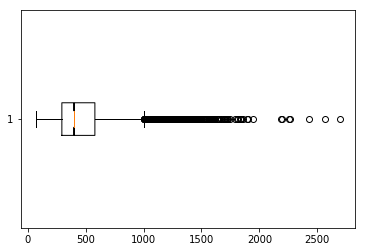

In [119]:
review_len = [len(rev) for rev in train_data + test_data]
plt.boxplot(review_len, notch=True, vert=False)

In [149]:
max_words = 500
train_data = sequence.pad_sequences(train_data, maxlen = max_words, padding='post')
test_data = sequence.pad_sequences(test_data, maxlen = max_words, padding='post')

## 3. Define the neural network.

We will use a sequential neural network with an embedding layer. A word embedding is a learned representation for text where words that have the same meaning have a similar representation. It is this approach to representing words and documents that may be considered one of the key breakthroughs of deep learning on challenging natural language processing problems.

The embedding layer creates a table of 5000 words(in this case) and then maps each word(which is currently in the form of integers) in such a way that the closely associated words have similar representations while the once which aren't related do not. Word embeddings are in fact a class of techniques where individual words are represented as real-valued vectors in a predefined vector space. Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network, and hence the technique is often lumped into the field of deep learning. 

Notice how in the following picture, similar words are clumped together.
![Word Embeddings](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2018/01/word-vector-space-similar-words.png)

In [176]:
######## HYPER-PARAMETERS ########
epochs = 2
batch_size = 128
learning_rate = 0.001
#################################


model = Sequential()
model.add(Embedding(max_vocab_size, 128, input_length = max_words))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
adam = optimizers.adam(lr = learning_rate)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

model.fit(
            train_data, 
            train_labels,
            epochs = epochs,
            batch_size = batch_size,
            validation_split = 0.2 
          )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 500, 128)          640000    
_________________________________________________________________
flatten_28 (Flatten)         (None, 64000)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               8192128   
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 129       
Total params: 8,832,257
Trainable params: 8,832,257
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 52s 3ms/step - loss: 0.5236 - acc: 0.7242 - val_loss: 0.3175 - val_acc: 0.8636
Epoch 2/2
20000/20000 [==============================] - 49s 2ms/step - lo

## 4. Testing our model.
We got the highest **validation accuracy of 86.98%** and a **test accuracy of 87.21%**. We trained a fine model. 


In [177]:
predicted_labels = model.predict(test_data)
print("accuracy =", accuracy_score(test_labels, predicted_labels.round())*100, "%")

accuracy = 86.6 %


## 5. Confusion Matrix.

Now, we plot the confusion matrix to gain a better understanding of our model's predictions. Y-axis - represents the true sentiments behind the reviews while the X-axis shows the predicted values.

Our model did perform decently but there are about 1,400 false positive results and 1,800 false negative ones. We will try out different models to gain better results.


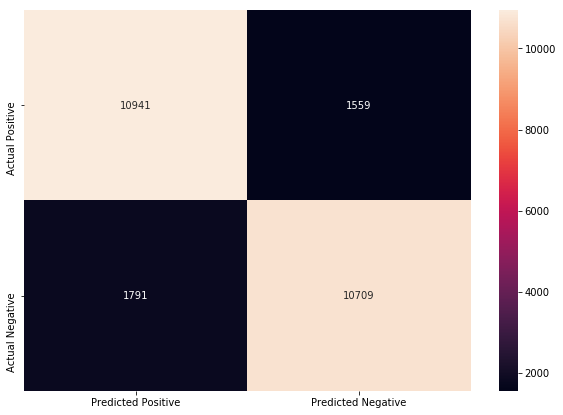

In [178]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

cm = confusion_matrix(test_labels, predicted_labels.round())
df_cm = pd.DataFrame(cm, index = ['Actual Positive', 'Actual Negative'], columns  = ['Predicted Positive', 'Predicted Negative'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='g')
                     

Please checkout the other sentiment analysis models in this repository. I experimented with various models to find out which one does the job better. 